# 1. Abalone Dataset

# Experiment - 5 (K-Nearest Neighbours)

Name : Shruti Hore

PRN : 24070126172

---

The age of an abalone can be found by cutting its shell and counting the number of rings on the shell. In the Abalone Dataset, you can find the age measurements of a large number of abalones along with a lot of other physical measurements.

The goal of the project is to develop a model that can predict the age of an abalone based purely on the other physical measurements. This would allow researchers to estimate the abalone’s age without having to cut its shell and count the rings.

Use K-NN technique for regression to predict the age of an abalone.


Dataset link: https://archive.ics.uci.edu/ml/datasets/abalone


## Import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset
df = pd.read_csv(
    "(5) abalone.csv",
    header=None,
    names=[
        "Sex", "Length", "Diameter", "Height",
        "Whole_weight", "Shucked_weight",
        "Viscera_weight", "Shell_weight", "Rings"
    ]
)

df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
2,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
3,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
4,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10


In [3]:
!pip install ucimlrepo

In [4]:
# Feature Selection
from ucimlrepo import fetch_ucirepo
abalone = fetch_ucirepo(id=1)

X = pd.DataFrame(abalone.data.features)
y = pd.DataFrame(abalone.data.targets.values.ravel()) # Convert y into an array.

data = pd.concat([X, y], axis=1)

display(X.describe(), y.describe(), data)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


,0
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,0
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


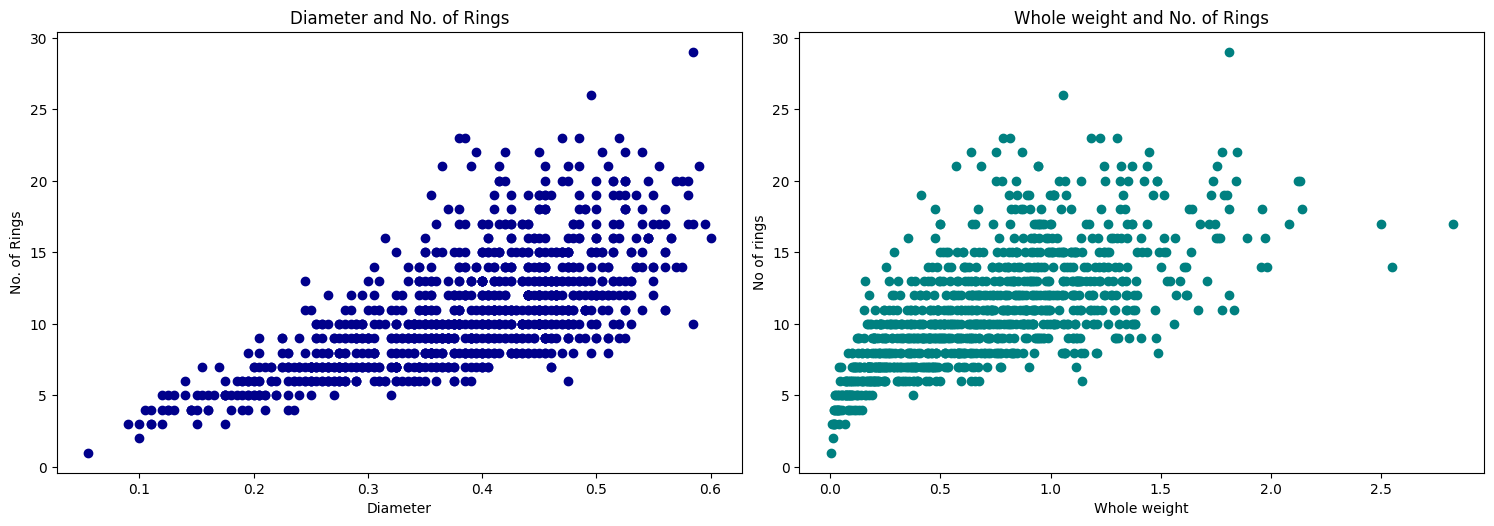

In [5]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout()

# Diameter and nr. of Rings
ax2.scatter(data["Diameter"][:1000], data[0][:1000], color="darkblue")
ax2.set(title="Diameter and No. of Rings",
       xlabel="Diameter",
       ylabel="No. of Rings")

# Whole weight and nr. of Rings
ax3.scatter(data["Whole_weight"][:1000], data[0][:1000], color="teal")
ax3.set(title="Whole weight and No. of Rings",
       xlabel="Whole weight",
       ylabel="No of rings");

In [6]:
# encoding sex column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

## Feature Scaling

- KNN uses distance.

- Features like weight and length are on very different scales — without scaling, weights will dominate.

In [7]:
# Apply feature scaling because KNN is a distance-based algorithm
# Scaling ensures all features contribute equally to distance calculation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fit_transform() → only on training data

transform() → test data (no refitting)

In [8]:
# Initialize the KNN Regressor
# n_neighbors = 15 reduces overfitting
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15,
                          metric='manhattan',
                          weights='distance') # Manhattan and 15 were estimated using k-flod cross validation
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=15, weights='distance')

In [9]:
# Predict the number of rings (age) for the test dataset
y_pred = knn.predict(X_test_scaled)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

R² Score: 0.5224
RMSE: 2.2737


In [11]:
# Round predictions to nearest integer for interpretability
y_pred_rounded = np.rint(y_pred).astype(int)
y_test_rounded = y_test.astype(int)

cm = confusion_matrix(y_test_rounded, y_pred_rounded)
cm

array([[ 1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  9,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  8,  9, 12,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  4, 11, 25,  1,  6,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  6, 32, 21, 19,  5,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 10, 25, 35, 16,  9,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5, 14, 38, 49, 26,  8,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  6, 20, 42, 42, 21,  2,  2,  1,  1,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  3,  7, 31, 26, 14,  8,  2,  1,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  6,  9, 17, 10,  4,  1,  0,  2,  0,  0,
         0,  0,  0,

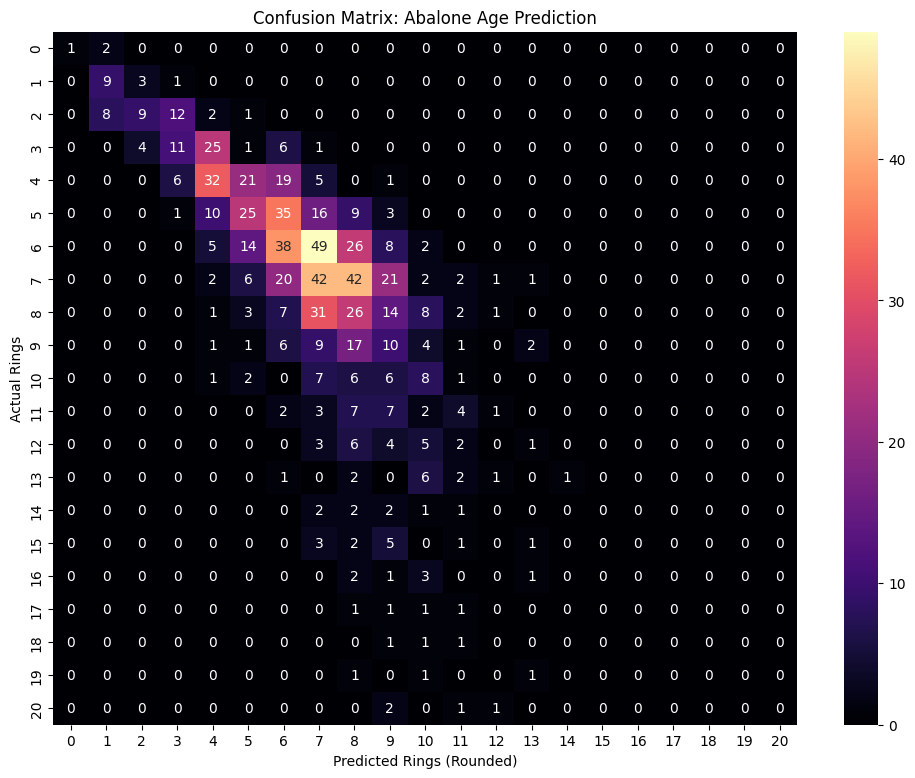

In [12]:
plt.figure(figsize=(12, 9))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title('Confusion Matrix: Abalone Age Prediction')
plt.xlabel('Predicted Rings (Rounded)')
plt.ylabel('Actual Rings')
plt.show()

In [13]:
# Convert y_test to 1-D
y_test_flat = y_test.values.ravel()

y_pred_flat = y_pred.ravel()

# comparison DataFrame
comparison = pd.DataFrame({
    "Actual Rings": y_test_flat[:10],
    "Predicted Rings": np.round(y_pred_flat[:10], 2)
})

comparison

,Actual Rings,Predicted Rings
0,9,11.14
1,8,9.31
2,16,13.37
3,9,10.33
4,14,12.33
5,11,9.27
6,7,8.54
7,6,8.56
8,7,6.62
9,10,10.60


## Conclusion

- KNN regression was applied to predict the age of abalones using physical measurements.

- The model achieved an R² score of approximately **0.52** and an RMSE of about **2.27** rings, indicating moderate predictive performance.

- The results show that abalone age can be reasonably estimated without destructive shell cutting, though prediction accuracy is limited by overlap in physical characteristics.

# 2. Benign & Malignant
---

The dataset bdiag.csv, included several imaging details from patients that had a biopsy to test for breast cancer.

The variable diagnosis classifies the biopsied tissue as M = malignant or B = benign.

a. Use a KNN with k=5 to predict Diagnosis using texture_mean and radius_mean.

b. Build the confusion matrix for the classification above

c. Plot the scatter plot for texture_mean and radius_mean and draw the border line for the prediction of Diagnosis based on the model in a)

d. Plot the scatter plot for texture_mean and radius_mean and draw the border line for the prediction of Diagnosis based knn, k=15

# Import libraries and load dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Load dataset
df = pd.read_csv('(5) bdiag.csv')

# Select required features and target
X = df[['texture_mean', 'radius_mean']]
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode: M=1, B=0

# a. KNN with k = 5 to predict

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [17]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred_5 = knn_5.predict(X_test)
knn_5.score(X_test, y_test)

0.8771929824561403

# b. Confusion Matrix

Confusion Matrix (k=5):
 [[101   7]
 [ 14  49]]


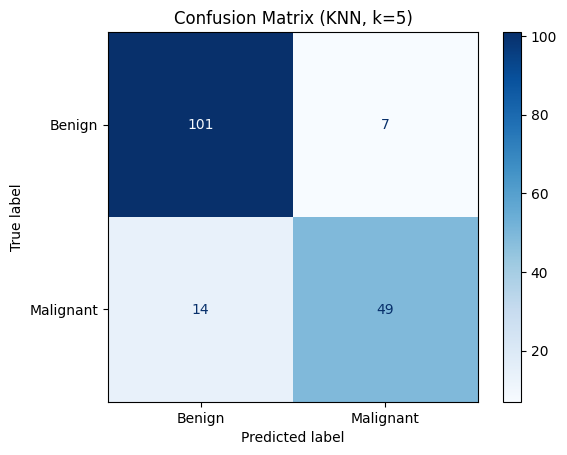

In [19]:
CM_5 = confusion_matrix(y_test, y_pred_5)
print("Confusion Matrix (k=5):\n", CM_5)

disp = ConfusionMatrixDisplay(
    confusion_matrix=CM_5,
    display_labels=["Benign", "Malignant"]
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN, k=5)")
plt.show()

# c. Scatter Plot + Decision Boundary (k = 5)

In [20]:
def plot_decision_boundary(model, X, y, title):
    import numpy as np
    import matplotlib.pyplot as plt

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="coolwarm")
    plt.xlabel("texture_mean")
    plt.ylabel("radius_mean")
    plt.title(title)
    plt.show()

BLUE
- model predicts Benign (0)
- mostly smaller radius and smoother texture

RED
- model predicts Malignant (1)
- mostly larger radius and rougher texture

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


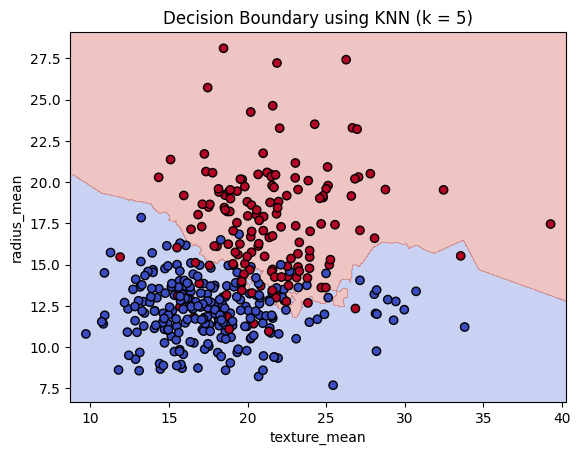

In [21]:
plot_decision_boundary(
    knn_5,
    X_train.values,
    y_train.values,
    "Decision Boundary using KNN (k = 5)"
)

# d. Scatter Plot + Decision Boundary (k = 15)

In [22]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [23]:
y_pred_15 = knn_15.predict(X_test)
knn_15.score(X_test, y_test)

0.9005847953216374

Confusion Matrix (k=15):
 [[103   5]
 [ 12  51]]


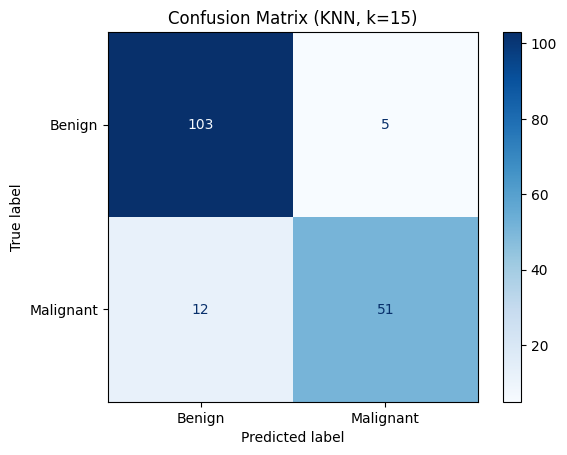

In [24]:
CM_15 = confusion_matrix(y_test, y_pred_15)
print("Confusion Matrix (k=15):\n", CM_15)

disp = ConfusionMatrixDisplay(
    confusion_matrix=CM_15,
    display_labels=["Benign", "Malignant"]
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN, k=15)")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


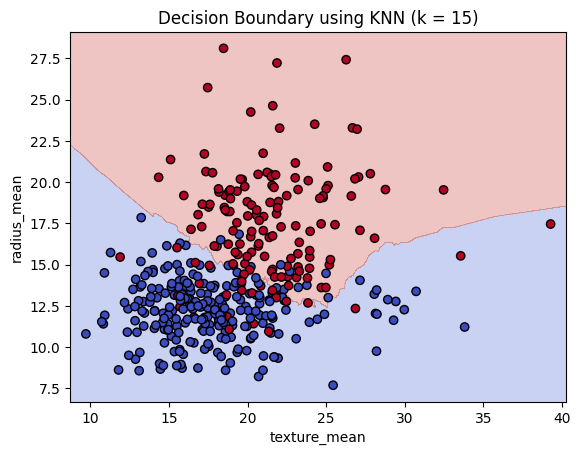

In [25]:
plot_decision_boundary(
    knn_15,
    X_train.values,
    y_train.values,
    "Decision Boundary using KNN (k = 15)"
)

### Comparing k = 5 & 15

- KNN with k = 5 produces a highly non-linear decision boundary, making it sensitive to local data patterns and prone to overfitting.

- KNN with k = 15 yields a smoother decision boundary, improving generalization and reducing overfitting.

- Increasing the value of k trades local sensitivity for stability, which may cause some malignant cases to be misclassified as benign.

# Evaluation

### Accuracy
- It measures the overall correctness of the model.

$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$


### Precision
- It measures how reliable the positive predictions are.

$
Precision = \frac{TP}{TP + FP}
$

### Recall
- It measures how well the model finds actual positive cases.

$
Precision = \frac{TP}{TP + FN}
$

## k = 5

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

In [27]:
# for k = 5
acc_5 = accuracy_score(y_test, y_pred_5)
prec_5 = precision_score(y_test, y_pred_5)
rec_5 = recall_score(y_test, y_pred_5)
rmse_5 = np.sqrt(mean_squared_error(y_test, y_pred_5))

print("KNN (k=5)")
print("Accuracy :", acc_5)
print("Precision:", prec_5)
print("Recall   :", rec_5)
print("RMSE     :", rmse_5)

KNN (k=5)
Accuracy : 0.8771929824561403
Precision: 0.875
Recall   : 0.7777777777777778
RMSE     : 0.3504383220252312


## k = 15

In [28]:
# for k = 15
y_pred_15 = knn_15.predict(X_test)

acc_15 = accuracy_score(y_test, y_pred_15)
prec_15 = precision_score(y_test, y_pred_15)
rec_15 = recall_score(y_test, y_pred_15)
rmse_15 = np.sqrt(mean_squared_error(y_test, y_pred_15))

print("\nKNN (k=15)")
print("Accuracy :", acc_15)
print("Precision:", prec_15)
print("Recall   :", rec_15)
print("RMSE     :", rmse_15)


KNN (k=15)
Accuracy : 0.9005847953216374
Precision: 0.9107142857142857
Recall   : 0.8095238095238095
RMSE     : 0.3153017676423058


- For k = 5
  - Slightly higher recall
  - More sensitive to noise

- For k = 15
  - More stable accuracy
  - Slightly lower recall but better generalization

In breast cancer diagnosis, a model with higher recall is often preferred, even if precision drops slightly.

# Conclusion

The K-Nearest Neighbours (KNN) algorithm was applied to the breast cancer diagnostic dataset to classify tumors as malignant or benign using selected features.

The model achieved good performance in terms of accuracy, precision, and recall, demonstrating its effectiveness for medical diagnosis.

The results showed that the choice of the value of k significantly influences model performance, with smaller k leading to higher variance and larger k providing better generalization.

 Since recall is critical in cancer detection, KNN proves to be a useful baseline model when appropriately tuned.
